<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

### **Reconhecimento de Entidades Nomeadas com spaCy e roBERTa** 

---


Ao ler um texto, um ser humano pode identificar naturalmente entidades nomeadas, como datas, moedas, locais, nomes de pessoas, códigos médicos, marcas etc., tal como:

 * Qual é o nome da variante covid19 que está em alta nas notícias?
 * Quais ferramentas são mencionadas em uma determinada descrição de trabalho e em que nível de proficiência?
 * etc.

Estaremos realizando a extração de entidades de dois textos diferentes, um texto curto e um muito mais longo e por fim, vamos comparar o desempenho do spaCy tradicional e do roBERTa.

In [ ]:
short_text = '''Amy Schneider, an engineering manager from Oakland, California, became the first woman and the fourth person on “Jeopardy!” to earn more than $1 million in winnings on Friday’s episode'''

In [ ]:
long_text = '''Good news for consumers, undoubtedly, and good news also for investors. Apple’s recent results, covering the three months to December 31 2016, saw the company’s chief financial officer Luca Maestri announce: ‘We returned nearly $15 billion to investors through share re-purchases and dividends during the quarter.’ The quarterly dividend itself was 57 cents a share, identical to the dividend for the previous three quarters and up on the 52 cents paid for each of the four quarters before that.
Business is brisk at Apple. On January 31, Tim Cook, Apple’s chief executive, said of the last three months of 2016: ‘We’re thrilled to report that our holiday quarter results generated Apple’s highest quarterly revenue ever, and broke multiple records along the way. We sold more iPhones than ever before and set all-time revenue records for iPhone, Services, Mac and Apple Watch'''

**Pré-requisitos**

In [ ]:
# install spacy library
!pip install -U spacy

# Install spacy-transformers
!pip install spacy[transformers]

# Download the traditional spacy english language large model
!python -m spacy download en_core_web_lg 

# Download the spacy transformer (roberta-base) english model
!python -m spacy download en_core_web_trf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 4.7 MB 30.4 MB/s 
     |████████████████████████████████| 1.1 MB 60.9 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
     |████████████████████████████████| 596 kB 84.8 MB/s 
     |████████████████████████████████| 6.6 MB 50.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
2022-08-18 20:24:02.276438: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 

In [ ]:
def print_entities(pipeline, text):
    
    # Create a document 
    document = pipeline(text)
    
    # Entity text & label extraction
    for entity in document.ents:
        print(entity.text + '->', entity.label_)
        
        
def visualize_entities(pipeline, text):
    
    # Create a document 
    document = pipeline(text)
        
    # Show entities in pretty manner
    displacy.render(document, jupyter=True, style='ent')

**spaCy Tradicional**

In [ ]:
import spacy
from spacy import displacy

# Load English large model
nlp_sm = spacy.load("en_core_web_lg")

In [ ]:
print_entities(nlp_sm, short_text)

Amy Schneider-> PERSON
Oakland-> GPE
California-> GPE
first-> ORDINAL
fourth-> ORDINAL
Jeopardy-> WORK_OF_ART
more than $1 million-> MONEY
Friday-> DATE


In [ ]:
visualize_entities(nlp_sm, short_text)

In [ ]:
print_entities(nlp_sm, long_text)

Apple-> ORG
the three months to December 31 2016-> DATE
Luca Maestri-> PERSON
nearly $15 billion-> MONEY
the quarter-> DATE
quarterly-> DATE
57 cents-> MONEY
the previous three quarters-> DATE
52 cents-> MONEY
the four quarters-> DATE
Apple-> ORG
January 31-> DATE
Tim Cook-> PERSON
Apple-> ORG
the last three months of 2016-> DATE
our holiday quarter-> DATE
Apple-> ORG
quarterly-> DATE
iPhone, Services-> ORG
Mac-> ORG
Apple Watch-> ORG


In [ ]:
visualize_entities(nlp_sm, long_text)

**Observação**: Para o texto curto, o resultado parece perfeito, pois todas as entidades foram identificadas corretamente. No entanto, para o segundo texto, o modelo cometeu os seguintes erros ao identificar erroneamente o `Apple Watch` como sendo um ORG (Organização) em vez de um Produto. O mesmo ocorrey ao identificar o `iPhone` e o `Mac`.

**spaCy Transformers — roBERTa**

In [ ]:
# This is from spacy-transformerslibrary introduced by spaCy in 2019. 
# It aims to power spacy pipelines by connecting spaCy to HuggingFace’s transformer models.

# Load the spacy transformer (roberta-base) model
roberta_nlp = spacy.load("en_core_web_trf")

In [ ]:
print_entities(roberta_nlp, short_text);

Amy Schneider-> PERSON
Oakland-> GPE
California-> GPE
first-> ORDINAL
fourth-> ORDINAL
Jeopardy-> WORK_OF_ART
$1 million-> MONEY
Friday-> DATE


In [ ]:
visualize_entities(roberta_nlp, short_text)

In [ ]:
print_entities(roberta_nlp, long_text)

Apple-> ORG
the three months to December 31 2016-> DATE
Luca Maestri-> PERSON
nearly $15 billion-> MONEY
the quarter-> DATE
quarterly-> DATE
57 cents-> MONEY
the previous three quarters-> DATE
the 52 cents-> MONEY
each of the four quarters before that-> DATE
Apple-> ORG
January 31-> DATE
Tim Cook-> PERSON
Apple-> ORG
the last three months of 2016-> DATE
holiday quarter-> DATE
Apple-> ORG
quarterly-> DATE
iPhones-> PRODUCT
Apple Watch-> PRODUCT


In [ ]:
visualize_entities(roberta_nlp, long_text)

A tabela de resumo a seguir contém o resultado do spaCy tradicional e do roBERTa no texto longo. Podemos observar claramente que o roBERTa superou o spaCy tradicional. roBERTa falhou apenas uma vez por não identificar o Mac.

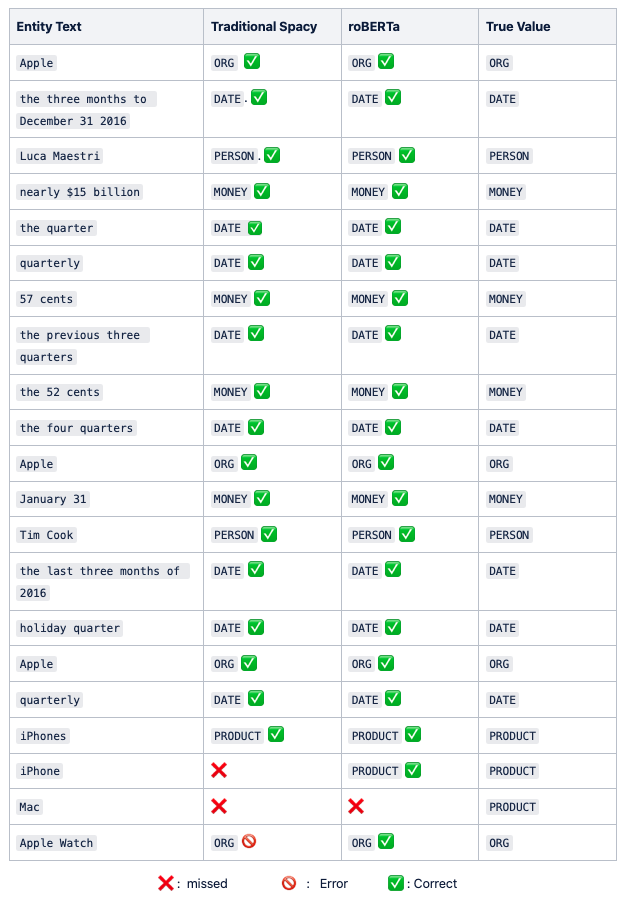

**Mais informações em:**

> https://towardsdatascience.com/named-entity-recognition-with-spacy-and-the-mighty-roberta-97d879f981